In [1]:
import logging

import numpy as np
import matplotlib.pyplot as plt

# Make analysis reproducible
np.random.seed(0)

# Enable logging
logging.basicConfig(level=logging.INFO)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import jax
import pprint

pprint.pprint(jax.devices())

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:jax._src.xla_bridge:Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.


[CpuDevice(id=0)]


In [3]:
device_id = 0
device = jax.devices()[device_id]
jax.config.update("jax_default_device", device)
device

CpuDevice(id=0)

In [4]:
from replay_trajectory_classification.sorted_spikes_simulation import (
    make_simulated_run_data,
)

MM_TO_INCHES = 1.0 / 25.4
TWO_COLUMN = 178.0 * MM_TO_INCHES
GOLDEN_RATIO = (np.sqrt(5) - 1.0) / 2.0

(
    time,
    linear_distance,
    sampling_frequency,
    spikes,
    place_fields,
) = make_simulated_run_data()

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
/Users/edeno/miniconda3/envs/non_local_detector/lib/python3.11/site-packages/replay_trajectory_classification/likelihoods/multiunit_likelihood.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
from replay_trajectory_classification import (
    SortedSpikesClassifier,
    Environment,
    RandomWalk,
    Uniform,
    estimate_movement_var,
)


movement_var = estimate_movement_var(linear_distance, sampling_frequency)

environment = Environment(place_bin_size=np.sqrt(movement_var))
continuous_transition_types = [
    [RandomWalk(movement_var=movement_var * 120), Uniform()],
    [Uniform(), Uniform()],
]

classifier = SortedSpikesClassifier(
    environments=environment,
    continuous_transition_types=continuous_transition_types,
    sorted_spikes_algorithm="spiking_likelihood_glm",
    sorted_spikes_algorithm_params={"knot_spacing": 10},
)
classifier.fit(linear_distance, spikes)

INFO:replay_trajectory_classification.classifier:Fitting initial conditions...
INFO:replay_trajectory_classification.classifier:Fitting continuous state transition...
INFO:replay_trajectory_classification.classifier:Fitting discrete state transition
INFO:replay_trajectory_classification.classifier:Fitting place fields...
INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/dask-scratch-space/worker-q6u_gpwy', purging
INFO:distributed.diskutils:Found stale lock file and directory '/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/dask-scratch-space/worker-tqlra64h', purging
INFO:distributed.diskutils:Found stale lock file and directory '/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/dask-scratch-space/worker-x5vko2la', purging
INFO:distribu

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:58496', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:58496
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58498
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:58499', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:58499
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58501
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:58502', name: 2, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:58502
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58504
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:58505', name: 3, status: init, memory: 0, processing: 0>


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


SortedSpikesClassifier(continuous_transition_types=[[RandomWalk(environment_name='',
                                                                movement_var=33.31009971953084,
                                                                movement_mean=0.0,
                                                                use_diffusion=False),
                                                     Uniform(environment_name='',
                                                             environment2_name=None)],
                                                    [Uniform(environment_name='',
                                                             environment2_name=None),
                                                     Uniform(environment_name='',
                                                             environment2_name=None)]],
                       discrete_transition_type=DiagonalDis...
                                                 fill_holes=False,
                                                 dilate=False,
                                                 bin_count_threshold=0),),
                       infer_track_interior=True,
                       initial_conditions_type=UniformInitialConditions(),
                       observation_models=(ObservationModel(environment_name='',
                                                            encoding_group=0),
                                           ObservationModel(environment_name='',
                                                            encoding_group=0)),
                       sorted_spikes_algorithm='spiking_likelihood_glm',
                       sorted_spikes_algorithm_params={'knot_spacing': 10})

In [6]:
from replay_trajectory_classification.sorted_spikes_simulation import (
    make_fragmented_continuous_fragmented_replay,
)

replay_time, test_spikes = make_fragmented_continuous_fragmented_replay()

state_names = ["Continuous", "Fragmented"]
results = classifier.predict(test_spikes, time=replay_time, state_names=state_names)

INFO:replay_trajectory_classification.classifier:Estimating likelihood...
INFO:replay_trajectory_classification.classifier:Estimating causal posterior...
INFO:replay_trajectory_classification.classifier:Estimating acausal posterior...
/Users/edeno/miniconda3/envs/non_local_detector/lib/python3.11/site-packages/replay_trajectory_classification/core.py:205: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  discrete_state_transition[state_k, state_k_1]


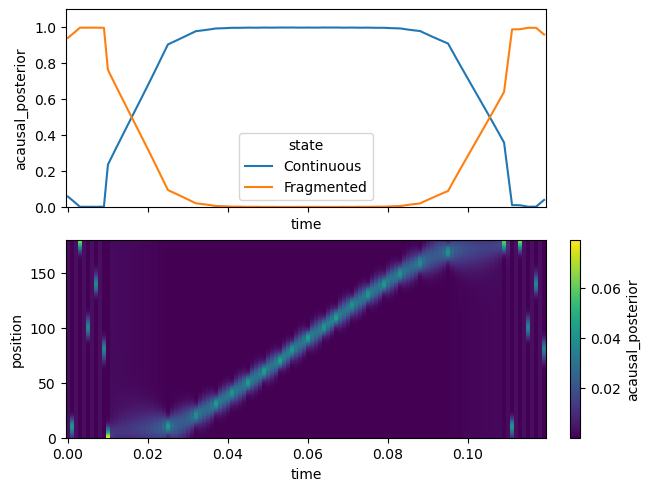

In [7]:
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True)
results.acausal_posterior.sum("position").plot(x="time", hue="state", ax=axes[0])
axes[0].set_ylim((0, 1.1))
results.acausal_posterior.sum("state").plot(x="time", y="position", ax=axes[1])

In [8]:
from non_local_detector import ContFragSortedSpikesClassifier

classifier3 = ContFragSortedSpikesClassifier(
    environments=environment,
    continuous_transition_types=continuous_transition_types,
    sorted_spikes_algorithm="sorted_spikes_kde",
    sorted_spikes_algorithm_params={"position_std": 5.0},
    sampling_frequency=1000,
)
classifier3

ContFragSortedSpikesClassifier(continuous_initial_conditions_types=[UniformInitialConditions(),
                                                                    UniformInitialConditions()],
                               continuous_transition_types=[[RandomWalk(environment_name='',
                                                                        movement_var=33.31009971953084,
                                                                        movement_mean=0.0,
                                                                        use_diffusion=False),
                                                             Uniform(environment_name='',
                                                                     environment2_name=None)],
                                                            [Uniform(environment_name='',
                                                                     environment2_n...
                               observation_models=[ObservationModel(environment_name='',
                                                                    encoding_group=0,
                                                                    is_local=False,
                                                                    is_no_spike=False),
                                                   ObservationModel(environment_name='',
                                                                    encoding_group=0,
                                                                    is_local=False,
                                                                    is_no_spike=False)],
                               sampling_frequency=1000,
                               sorted_spikes_algorithm='sorted_spikes_kde',
                               sorted_spikes_algorithm_params={'position_std': 5.0},
                               state_names=['Continuous', 'Fragmented'])

In [9]:
spike_times = [time[spike.astype(bool)] for spike in spikes.T]
classifier3.fit(time, linear_distance, spike_times)

INFO:non_local_detector.models.base:Fitting initial conditions...
INFO:non_local_detector.models.base:Fitting discrete state transition
INFO:non_local_detector.models.base:Fitting continuous state transition...
INFO:non_local_detector.models.base:Fitting place fields...


Encoding models:   0%|          | 0/19 [00:00<?, ?cell/s]

ContFragSortedSpikesClassifier(continuous_initial_conditions_types=[UniformInitialConditions(),
                                                                    UniformInitialConditions()],
                               continuous_transition_types=[[RandomWalk(environment_name='',
                                                                        movement_var=33.31009971953084,
                                                                        movement_mean=0.0,
                                                                        use_diffusion=False),
                                                             Uniform(environment_name='',
                                                                     environment2_name=None)],
                                                            [Uniform(environment_name='',
                                                                     environment2_n...
                               observation_models=[ObservationModel(environment_name='',
                                                                    encoding_group=0,
                                                                    is_local=False,
                                                                    is_no_spike=False),
                                                   ObservationModel(environment_name='',
                                                                    encoding_group=0,
                                                                    is_local=False,
                                                                    is_no_spike=False)],
                               sampling_frequency=1000,
                               sorted_spikes_algorithm='sorted_spikes_kde',
                               sorted_spikes_algorithm_params={'position_std': 5.0},
                               state_names=['Continuous', 'Fragmented'])

In [10]:
time_range = np.array([replay_time.min(), replay_time.max()])
test_spike_times = [replay_time[spike.astype(bool)] for spike in test_spikes.T]
results3 = classifier3.predict(test_spike_times, time_range)
results3

INFO:non_local_detector.models.base:Computing log likelihood...


Non-Local Likelihood:   0%|          | 0/19 [00:00<?, ?cell/s]

INFO:non_local_detector.models.base:Computing posterior...
INFO:non_local_detector.models.base:Finished computing posterior...


<xarray.Dataset>
Dimensions:                      (time: 120, state_bins: 684, states: 2,
                                  state_ind: 684)
Coordinates:
  * time                         (time) float64 0.0 0.001 0.002 ... 0.118 0.119
  * state_bins                   (state_bins) object MultiIndex
  * state                        (state_bins) object 'Continuous' ... 'Fragme...
  * position                     (state_bins) float64 0.2632 0.7895 ... 179.7
  * state_ind                    (state_ind) int64 0 0 0 0 0 0 0 ... 1 1 1 1 1 1
  * states                       (states) <U10 'Continuous' 'Fragmented'
    environments                 (states) <U1 '' ''
    encoding_groups              (states) int64 0 0
Data variables:
    acausal_posterior            (time, state_bins) float32 0.0009428 ... 0.0...
    acausal_state_probabilities  (time, states) float64 0.05793 ... 0.9608
Attributes:
    marginal_log_likelihoods:  -183.70654

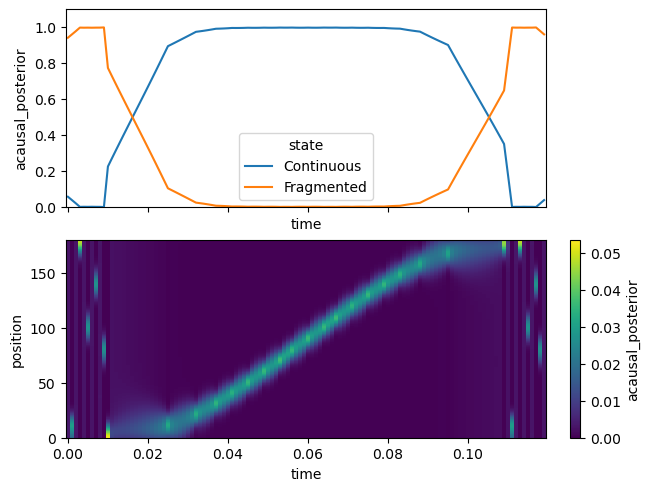

In [11]:
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True)
results3.acausal_posterior.unstack("state_bins").sum("position").plot(
    x="time", hue="state", ax=axes[0]
)
axes[0].set_ylim((0, 1.1))
results3.acausal_posterior.unstack("state_bins").sum("state").plot(
    x="time", y="position", ax=axes[1]
)

In [12]:
results3.time

<xarray.DataArray 'time' (time: 120)>
array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019,
       0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029,
       0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039,
       0.04 , 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049,
       0.05 , 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059,
       0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069,
       0.07 , 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079,
       0.08 , 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109,
       0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119])
Coordinates:
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 0.116 0.117 0.118 0.119

In [13]:
replay_time

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119])

In [14]:
from non_local_detector.simulate.clusterless_simulation import make_simulated_run_data


(
    time,
    position,
    sampling_frequency,
    multiunits,
    multiunits_spikes,
) = make_simulated_run_data()

In [15]:
from replay_trajectory_classification.clusterless_simulation import (
    make_fragmented_continuous_fragmented_replay,
)

replay_time, test_multiunits = make_fragmented_continuous_fragmented_replay()

In [16]:
from non_local_detector import ContFragClusterlessClassifier

spike_times = [time[spike.astype(bool)] for spike in multiunits_spikes.T]
spike_waveform_features = [multiunits[is_spike.astype(bool), :, ind] for ind, is_spike in enumerate(multiunits_spikes.T)]

classifier4 = ContFragClusterlessClassifier(
    environments=environment,
    continuous_transition_types=continuous_transition_types,
    clusterless_algorithm="clusterless_kde",
    clusterless_algorithm_params={"position_std": 12.5, "waveform_std": 1.0},
    sampling_frequency=1000,
).fit(time, position, spike_times, spike_waveform_features)

INFO:non_local_detector.models.base:Fitting initial conditions...
INFO:non_local_detector.models.base:Fitting discrete state transition
INFO:non_local_detector.models.base:Fitting continuous state transition...
INFO:non_local_detector.models.base:Fitting clusterless spikes...


In [24]:
time_range = np.array([replay_time.min(), replay_time.max()])

test_spike_times = []
test_spike_waveform_features = []
for multiunit in np.moveaxis(test_multiunits, -1, 0):
    is_spike = np.any(~np.isnan(multiunit), axis=1)
    test_spike_times.append(replay_time[is_spike])
    test_spike_waveform_features.append(multiunit[is_spike])

results4 = classifier4.predict(test_spike_times, test_spike_waveform_features, time_range)
results4

INFO:non_local_detector.models.base:Computing log likelihood...


Non-Local Likelihood:   0%|          | 0/5 [00:00<?, ?electrode/s]

INFO:non_local_detector.models.base:Computing posterior...
INFO:non_local_detector.models.base:Finished computing posterior...


<xarray.Dataset>
Dimensions:                      (time: 117, state_bins: 666, states: 2,
                                  state_ind: 666)
Coordinates:
  * time                         (time) float64 0.0 0.001 0.002 ... 0.115 0.116
  * state_bins                   (state_bins) object MultiIndex
  * state                        (state_bins) object 'Continuous' ... 'Fragme...
  * position                     (state_bins) float64 0.2628 0.7883 ... 174.7
  * state_ind                    (state_ind) int64 0 0 0 0 0 0 0 ... 1 1 1 1 1 1
  * states                       (states) <U10 'Continuous' 'Fragmented'
    environments                 (states) <U1 '' ''
    encoding_groups              (states) int64 0 0
Data variables:
    acausal_posterior            (time, state_bins) float32 0.0009799 ... 0.0...
    acausal_state_probabilities  (time, states) float64 0.05745 ... 0.9521
Attributes:
    marginal_log_likelihoods:  -712.0087

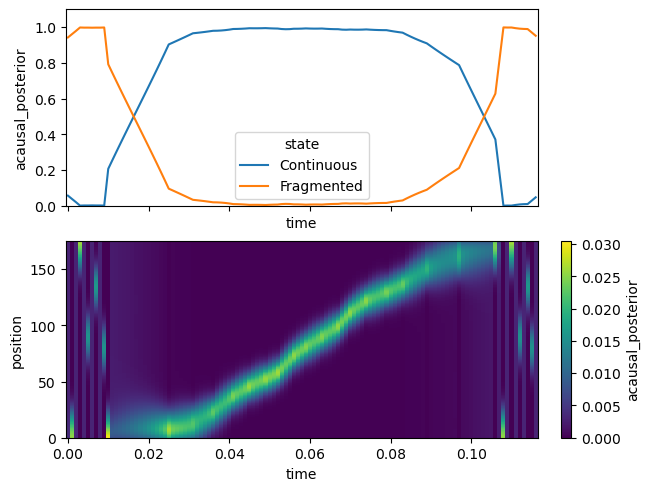

INFO:distributed.core:Event loop was unresponsive in Nanny for 3805.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3805.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3805.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3805.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3805.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This ca

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True)
results4.acausal_posterior.unstack("state_bins").sum("position").plot(
    x="time", hue="state", ax=axes[0]
)
axes[0].set_ylim((0, 1.1))
results4.acausal_posterior.unstack("state_bins").sum("state").plot(
    x="time", y="position", ax=axes[1]
)